In [1]:
#mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
#inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

In [2]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

In [3]:
IMAGE_SHAPE = (224, 224)

In [4]:
from tensorflow.keras.layers import Layer

# Define a custom layer that wraps the KerasLayer from TensorFlow Hub
class HubLayer(Layer):
    def __init__(self, handle, **kwargs):
        super(HubLayer, self).__init__(**kwargs)
        self.handle = handle
        self.hub_layer = hub.KerasLayer(self.handle, trainable=False)  # Set trainable to False

    def call(self, inputs):
        return self.hub_layer(inputs)

In [5]:
# Now create the Sequential model using the custom HubLayer
classifier = tf.keras.Sequential([
    HubLayer("https://tfhub.dev/google/imagenet/inception_v3/classification/5", input_shape=IMAGE_SHAPE + (3,)),
])

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_layer (HubLayer)        (None, 1001)              23853833  
                                                                 
Total params: 23,853,833
Trainable params: 0
Non-trainable params: 23,853,833
_________________________________________________________________


61306/61306 [==============================] - 0s 6us/step


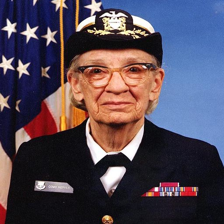

In [7]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [8]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [9]:
#newaxis is used to increase the dimension of the existing array by one more dimension
result = classifier.predict(grace_hopper[np.newaxis, ...]) #'...'(ellipsis) means "include all existing dimensions here
result.shape

1/1 [==============================] - 0s 415ms/step


(1, 1001)

In [10]:
result

array([[ 0.4658203 ,  1.2219679 ,  0.08426747, ..., -1.6039379 ,
        -0.7553046 , -1.050797  ]], dtype=float32)

In [11]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=458>

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')


10484/10484 [==============================] - 0s 0us/step


In [13]:
labels_path

'C:\\Users\\VICTUS\\.keras\\datasets\\ImageNetLabels.txt'

In [14]:
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [15]:
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

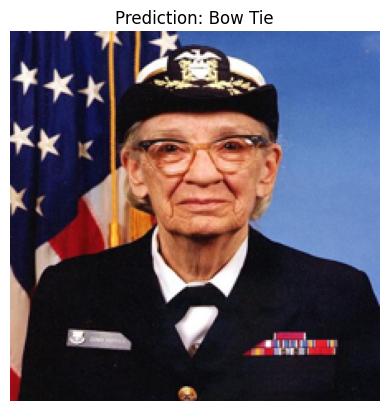

In [16]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())